# Regressão linear múltipla
## Objetivo: criar um modelo matemático de regressão múltipla para prever a nota de redação tendo como variáveis independentes as notas de seus componentes

# 1. Importando as bibliotecas e o dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression

sns.set()

In [3]:
enem = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [4]:
enem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [5]:
enem.shape

(499940, 28)

# 2. Tratamento de dados

In [6]:
# selecionando apenas um colégio

colegiox = enem[enem['CO_ESCOLA']==35132287]

In [7]:
# valores faltantes

colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

In [8]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

# 3. Regressão múltipla com statsmodels

In [10]:
modelo1 = smf.ols('NOTA_REDACAO ~ COMP2 + COMP4 + COMP5', data=colegiox).fit()

In [11]:
residuos = modelo1.resid
residuos

17        -4.498054
10760     33.309358
13315     -5.718021
20006    -26.432059
26697      1.349594
            ...    
426829    35.760528
428241   -17.683137
443242   -17.497499
462446   -56.783460
483420    34.529325
Length: 130, dtype: float64

## Teste de normalidade dos resíduos

- Ho = distribuição normal: p>0.05
- Ha = distribuição não normal: p<=0.05

In [13]:
estatistica, p = stats.shapiro(residuos)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9847341775894165
p-valor: 0.15436169505119324


Text(0.5, 1.0, 'Normal Q-Q Plot - Resíduos')

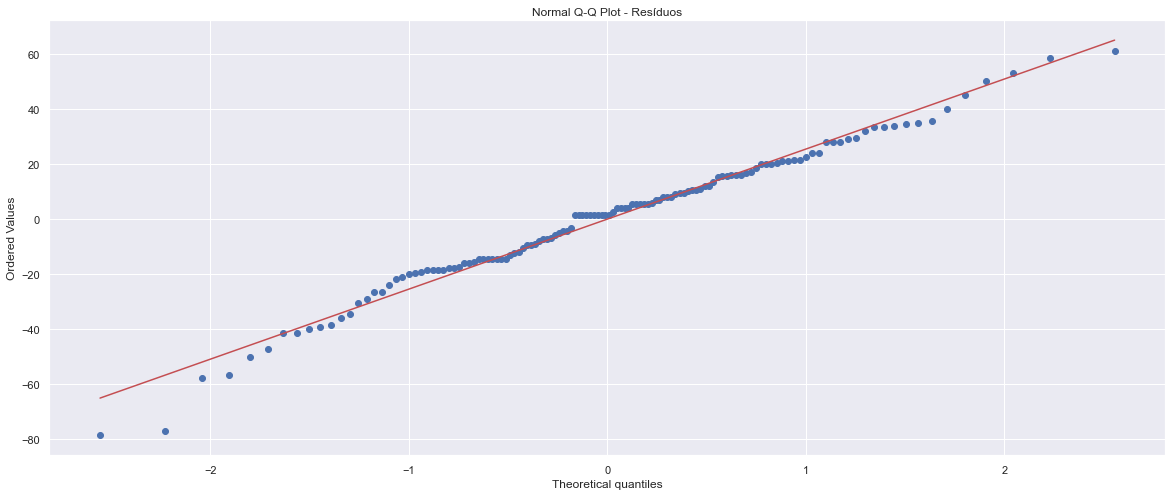

In [17]:
plt.figure(figsize=(20,8))
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot - Resíduos')

## Análise da homocedasticidade dos resíduos

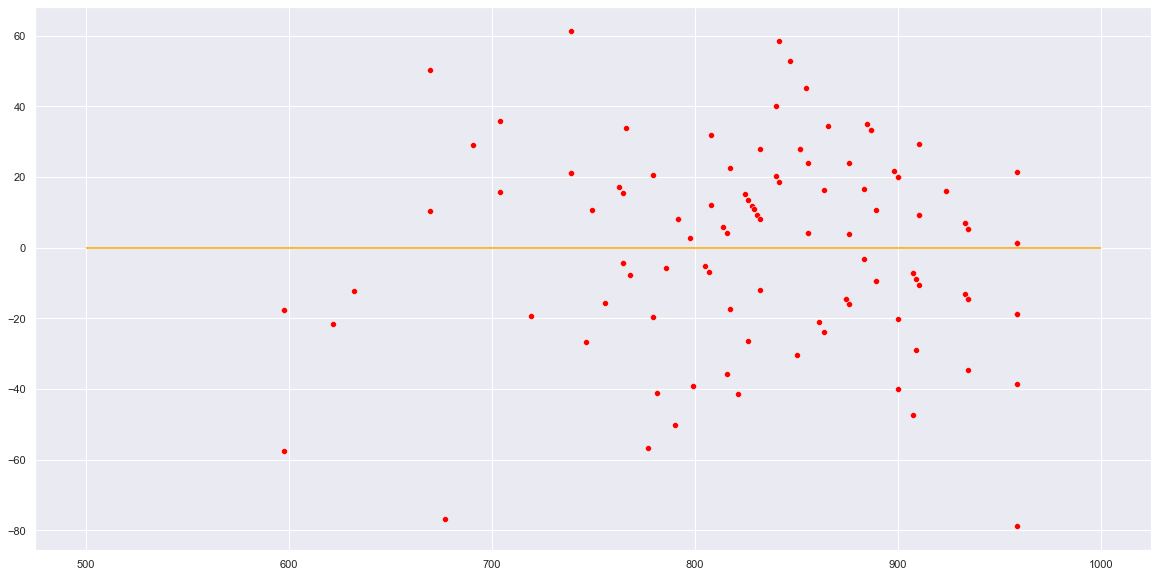

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=residuos, x=modelo1.predict(), color='red')
plt.hlines(y=0, xmin=500,xmax=1000,color='orange')

## Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)

- Ho = existe homocedasticidade: p>0.05
- Ha = não existe homocedasticidade: p<= 0.05

In [21]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo1.resid, modelo1.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 7.939832568694056
p-valor: 0.04727168987447729
f-valor: 2.7320376081970013
f_p-valor: 0.04659801474386954


Vamos aceitar a homocedasticidade

## Outliers nos resíduos
(Entre -3 e 3)

In [22]:
outliers = modelo1.outlier_test()

In [24]:
outliers.max()

student_resid    2.466219
unadj_p          0.957876
bonf(p)          1.000000
dtype: float64

In [25]:
outliers.min()

student_resid   -3.260297
unadj_p          0.001434
bonf(p)          0.186452
dtype: float64

## Ausência de multicolinearidade
- Somente entre as variáveis independentes
- Considerada multicolinearidade quando r > 0.9

In [26]:
variaveis = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [27]:
variaveis.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [29]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,COMP2,COMP4,COMP5
COMP2,1.000000,0.375906,0.298434
COMP4,0.375906,1.000000,0.428872
COMP5,0.298434,0.428872,1.000000


In [35]:
vif = add_constant(variaveis) # função espera a presença de uma constante na matriz de variáveis explicativas
pd.Series([variance_inflation_factor(vif.values, j) for j in range(vif.shape[1])], index=vif.columns) # deve ser menor que 5

const    72.466982
COMP2     1.196714
COMP4     1.335832
COMP5     1.259221
dtype: float64

## Análise do modelo
- Análise do modelo;
- Intercept;
- p_valor para cada coeficiente < 0.05 (estatisticamente significativos);
- adjusted R-squared (explicação do modelo através dos dados);
- p_valor da estatística F<0.05 (valida o modelo de regressão).

In [36]:
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:           NOTA_REDACAO   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     507.2
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           3.97e-70
Time:                        14:52:26   Log-Likelihood:                -604.30
No. Observations:                 130   AIC:                             1217.
Df Residuals:                     126   BIC:                             1228.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1987     19.162      6.064      0.0

#### Equação
Nota redação = 116.1987 + 1.2831.COMP2 + 1.7298.COMP4 + 1.1993.COMP5

In [37]:
# Criando uma coluna com previsão
colegiox['previsao'] = modelo1.fittedvalues

<ipython-input-37-9c81978fff88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colegiox['previsao'] = modelo1.fittedvalues


In [38]:
colegiox.head(10)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsao
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,764.498054
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,886.690642
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,785.718021
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,826.432059
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
26911,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,120.0,160.0,160.0,180.0,780.0,Sim,762.822631
43814,"1,90E+11",São Paulo,18,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,160.0,160.0,140.0,180.0,800.0,Sim,779.550082
43870,"1,90E+11",São Paulo,17,F,1,preta,2,2,privada,35132287.0,...,Inglês,1.0,140.0,200.0,160.0,180.0,180.0,860.0,Sim,900.067246
44150,"1,90E+11",São Paulo,17,F,1,amarela,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,958.650406
48417,"1,90E+11",São Paulo,17,M,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,120.0,140.0,120.0,160.0,680.0,Sim,669.642901


# 4. Regressão múltipla com sklearn

In [46]:
independente = colegiox[['COMP2', 'COMP4', 'COMP5']]

In [47]:
dependente = colegiox['NOTA_REDACAO']

In [48]:
modelo2 = LinearRegression()
modelo2.fit(independente,dependente)

LinearRegression()

In [49]:
modelo2.intercept_

116.19870291860752

In [50]:
modelo2.coef_

array([1.28310055, 1.72982856, 1.1993294 ])

### Equação:
Nota Redação =  116.1987 + 1.2831.COMP2 + 1.7298.COMP4 + 1.1993.COMP5